In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the image
image = cv2.imread('dolphin.jpg')

### Blur Filter

In [3]:
# Apply a blur filter
blur_image = cv2.GaussianBlur(image, (15, 15), 0)

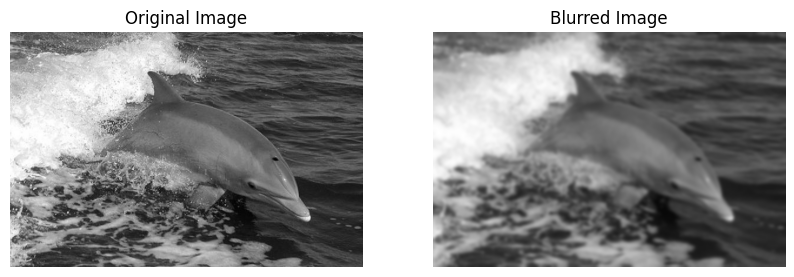

In [4]:
# Display the original and blurred images using Matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display blurred image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blur_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.show()

In [5]:
def sharpen_image(image):
    # Define the sharpening kernel
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    
    # Apply the sharpening kernel
    sharpened_image = cv2.filter2D(image, -1, kernel)
    
    return sharpened_image

### Sharpened Filter

In [6]:
# Apply the sharpening filter
sharpened_image = sharpen_image(image)

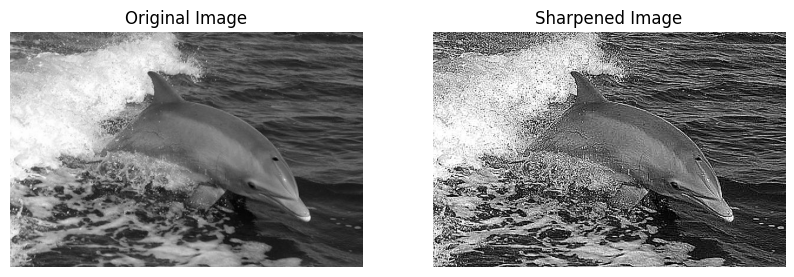

In [7]:
# Display the original and blurred images using Matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display blurred image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

### Median Filter

In [8]:
median_filtered_image = cv2.medianBlur(image, 9)

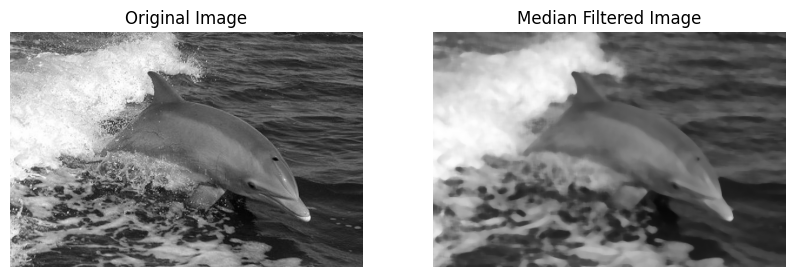

In [9]:
# Display the original and blurred images using Matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display blurred image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()

### Find Vertical Edges

In [10]:
def find_vertical_edges(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Sobel operator
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    
    # Convert the result back to 8-bit image
    sobel_x = cv2.convertScaleAbs(sobel_x)
    
    return sobel_x

In [11]:
# Find vertical edges
vertical_edges = find_vertical_edges(image)

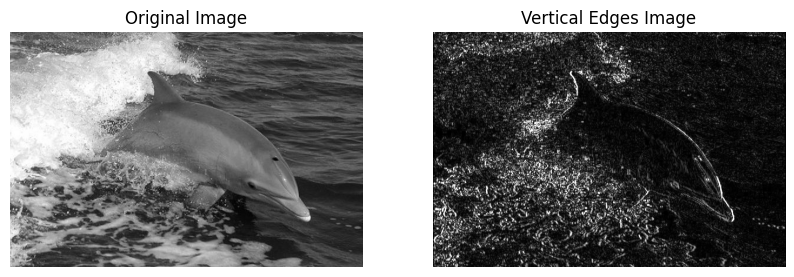

In [12]:
# Display the original and blurred images using Matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display blurred image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vertical_edges, cv2.COLOR_BGR2RGB))
plt.title('Vertical Edges Image')
plt.axis('off')

plt.show()

### Generate Gaussian Noise

In [13]:
def add_gaussian_noise(image, mean=0, sigma=25):
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    
    # Add Gaussian noise to the image
    noisy_image = cv2.add(image, gaussian_noise)
    
    return noisy_image

In [14]:
# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image)

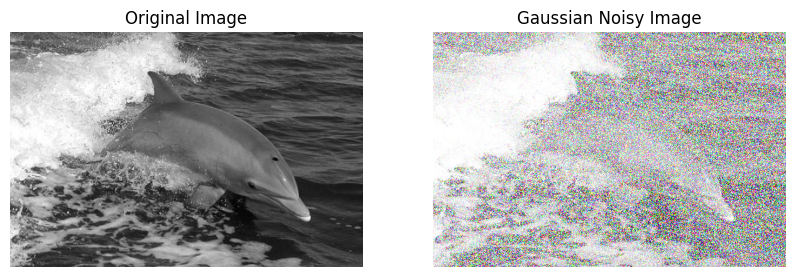

In [15]:
# Display the original and blurred images using Matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display blurred image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noisy Image')
plt.axis('off')

plt.show()

### Crop Dolphin's Face

In [16]:
x = 350
y = 150
width = 200
height = 200

# Define bounding box coordinates of the dolphin's face (x, y, width, height)
dolphin_face_box = (x, y, width, height) 

# Crop the dolphin's face using the bounding box
cropped_dolphin_face = image[y:y+height, x:x+width]


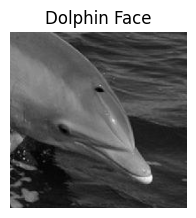

In [17]:
# Display the original and blurred images using Matplotlib
plt.figure(figsize=(5, 5))

# Display blurred image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_dolphin_face, cv2.COLOR_BGR2RGB))
plt.title('Dolphin Face')
plt.axis('off')

plt.show()

### Calculate Correlation Between Two Images, Correlation Map, Plotting Maximum Match Correlation Indices

In [18]:
def calculate_cross_correlation(image1, image2):
    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Calculate cross-correlation
    cross_correlation = cv2.matchTemplate(gray_image1, gray_image2, cv2.TM_CCOEFF_NORMED)
    
    return cross_correlation

In [19]:
def plot_maximum_match_indices(correlation_map):
    # Find the location of the maximum correlation value
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(correlation_map)
    
    # Plot the correlation map
    plt.imshow(correlation_map, cmap='jet', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title('Cross-correlation Map with Maximum Match Indices')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    
    # Plot the maximum match indices
    plt.plot(max_loc[0], max_loc[1], 'ro')  # Plotting the maximum correlation point in red
    plt.show()

In [20]:
# Calculate cross-correlation
cross_correlation_with_blur_image = calculate_cross_correlation(image, blur_image)

print("Cross-correlation:", cross_correlation_with_blur_image)

Cross-correlation: [[0.9710441]]


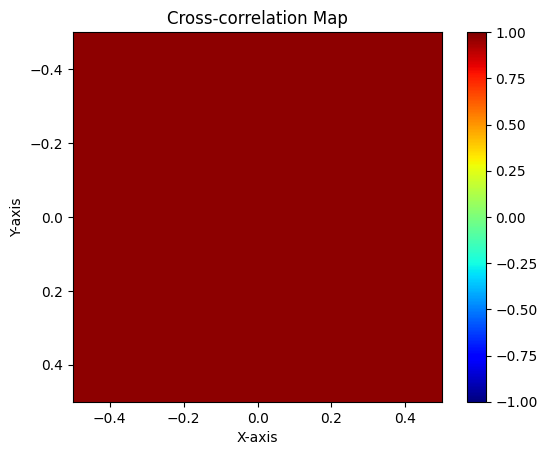

In [21]:
# Plot the correlation map
plt.imshow(cross_correlation_with_blur_image, cmap='jet', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Cross-correlation Map')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

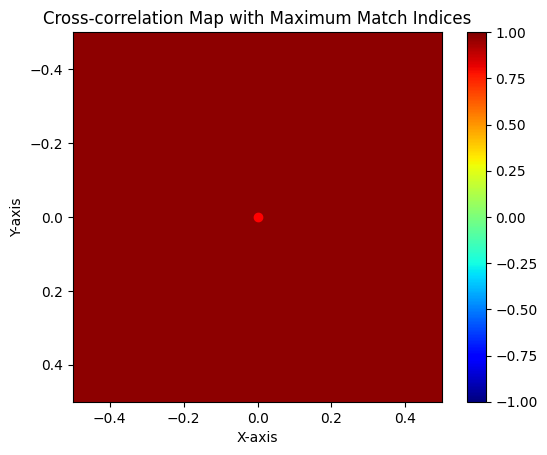

In [22]:
# Plot the correlation map with maximum match indices
plot_maximum_match_indices(cross_correlation_with_blur_image)

In [23]:
cross_correlation_with_sharpened_image = calculate_cross_correlation(image, sharpened_image)

print("Cross-correlation:", cross_correlation_with_sharpened_image)

Cross-correlation: [[0.8038628]]


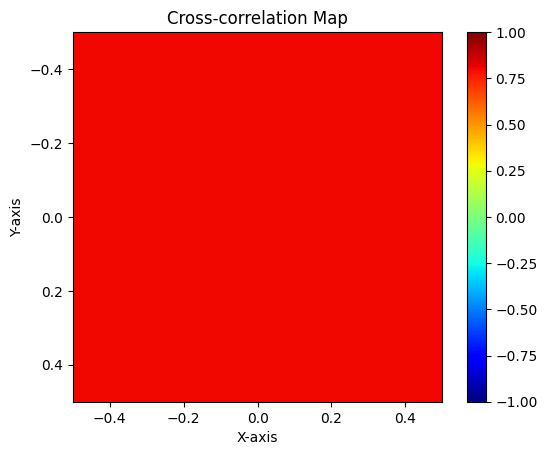

In [24]:
# Plot the correlation map
plt.imshow(cross_correlation_with_sharpened_image, cmap='jet', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Cross-correlation Map')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

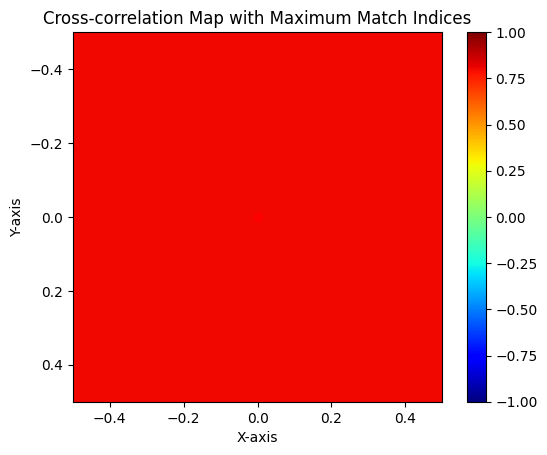

In [25]:
# Plot the correlation map with maximum match indices
plot_maximum_match_indices(cross_correlation_with_sharpened_image)

In [26]:
cross_correlation_median_filtered_image = calculate_cross_correlation(image, median_filtered_image)

print("Cross-correlation:", cross_correlation_median_filtered_image)

Cross-correlation: [[0.9693821]]


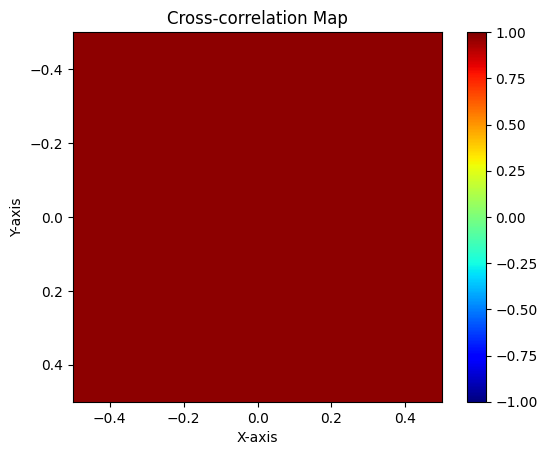

In [27]:
# Plot the correlation map
plt.imshow(cross_correlation_median_filtered_image, cmap='jet', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Cross-correlation Map')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

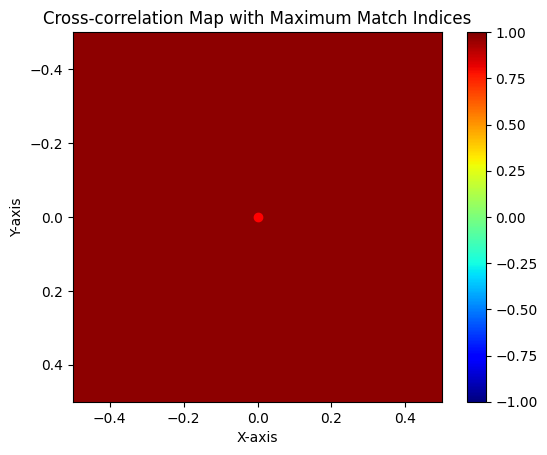

In [28]:
# Plot the correlation map with maximum match indices
plot_maximum_match_indices(cross_correlation_median_filtered_image)